<a href="https://colab.research.google.com/github/RaneemGhalion/ANN_implementation/blob/main/ANN_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pip==21.3.1


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 9.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pip-tools 6.13.0 requires pip>=22.2, but you have pip 21.3.1 which is incompatible.


In [1]:
! pip install tensorflow-gpu

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [33]:
df=pd.read_csv("/content/drive/MyDrive/Ai/ANN/Churn_Modelling.csv")

In [34]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [35]:
## devide the dataset into independent and dependent features

X=df.iloc[:,3:13]
y=df.iloc[:,13]

In [36]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [37]:
# prompt: Using dataframe X: one hot encoding for categorical data

X = pd.get_dummies(X, columns=['Geography', 'Gender'], dtype=int)
X.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


In [41]:
# X.drop(["Geography_France","Geography","Gender"],axis=1)

In [42]:
# prompt: import train test split from sklearn and split the data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [43]:
# prompt: feature scaling standered scalar

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)


In [44]:
X_train.shape

(8000, 13)

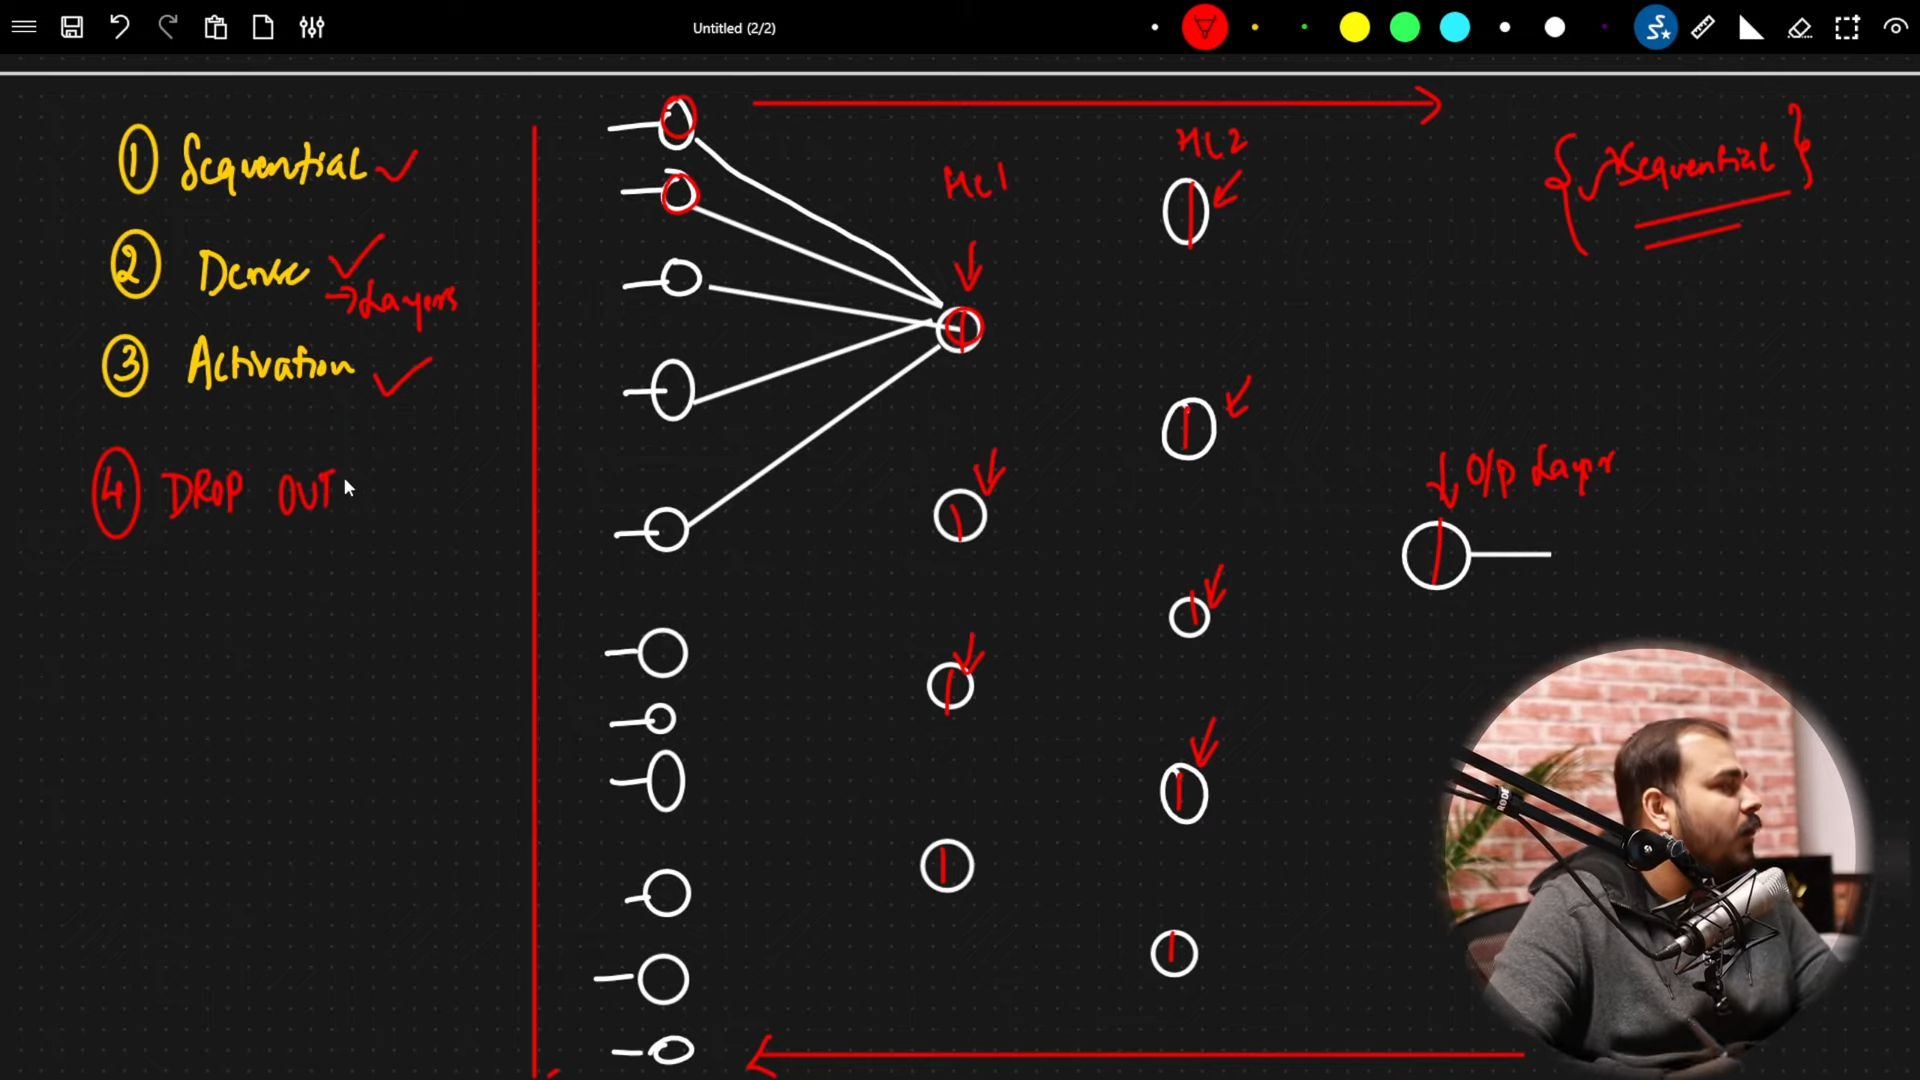

In [46]:
# prompt: import sequential and dense model from tensorflow and leakyrelu , Prelu , Relu

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, PReLU, ReLU
from tensorflow.keras.layers import Dropout  #regularization




In [47]:
# prompt: initialize ANN

classifier = Sequential()


In [49]:
# add input layer

classifier.add(Dense(units=13,activation="relu"))

In [51]:
## adding first hidden layer

classifier.add(Dense(units=7,activation="relu"))
classifier.add(Dense(units=6,activation="relu"))


In [52]:
# adding output layer
classifier.add(Dense(1,activation="sigmoid"))

In [55]:
import tensorflow as tf
opt=tf.keras.optimizers.Adam(learning_rate=0.01)

In [56]:
classifier.compile(optimizer=opt,loss="binary_crossentropy",metrics=["accuracy"])

In [59]:
## early stopping
early_stoping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [61]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stoping)

Epoch 1/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3180 - accuracy: 0.8683 - val_loss: 0.3382 - val_accuracy: 0.8535
Epoch 2/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3164 - accuracy: 0.8668 - val_loss: 0.3487 - val_accuracy: 0.8561
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3171 - accuracy: 0.8703 - val_loss: 0.3518 - val_accuracy: 0.8557
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3154 - accuracy: 0.8673 - val_loss: 0.3448 - val_accuracy: 0.8599
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3158 - accuracy: 0.8658 - val_loss: 0.3433 - val_accuracy: 0.8588
Epoch 6/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3243 - accuracy: 0.8729 - val_loss: 0.3364 - val_accuracy: 0.8584
Epoch 7/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.3174 - accuracy: 0.8705 - val_loss: 0.3510 - val_accuracy:

In [64]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

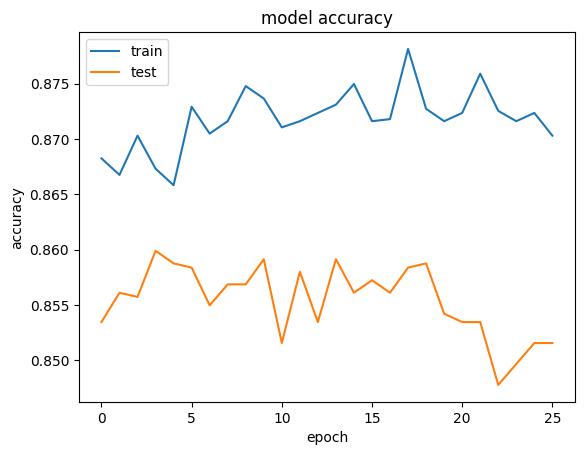

In [69]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



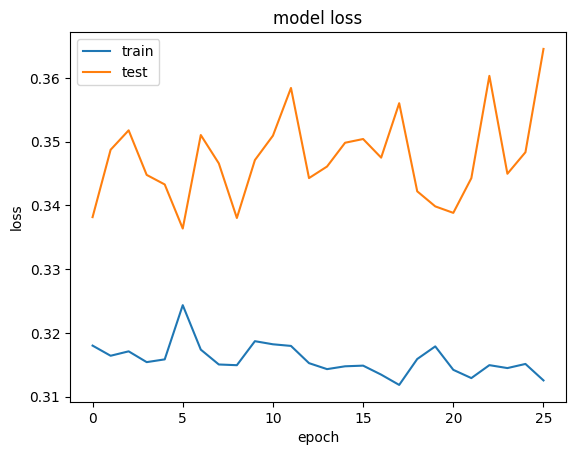

In [67]:

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [70]:
y_pred=classifier.predict(X_test)
y_pred=(y_pred>=0.5)

63/63 [==============================] - 0s 2ms/step


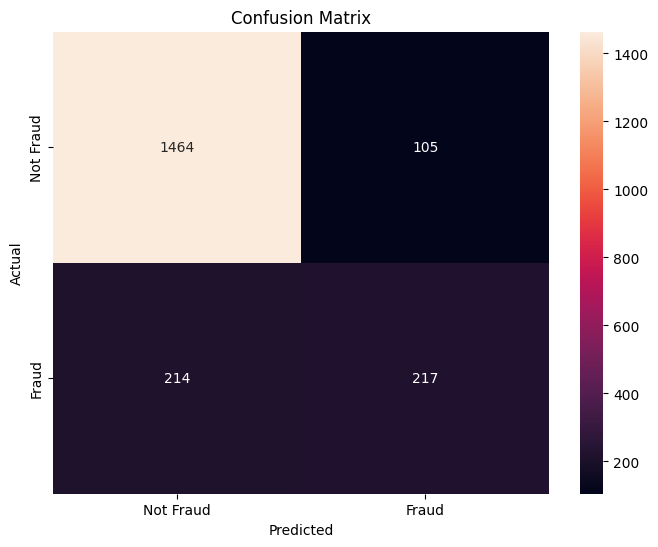

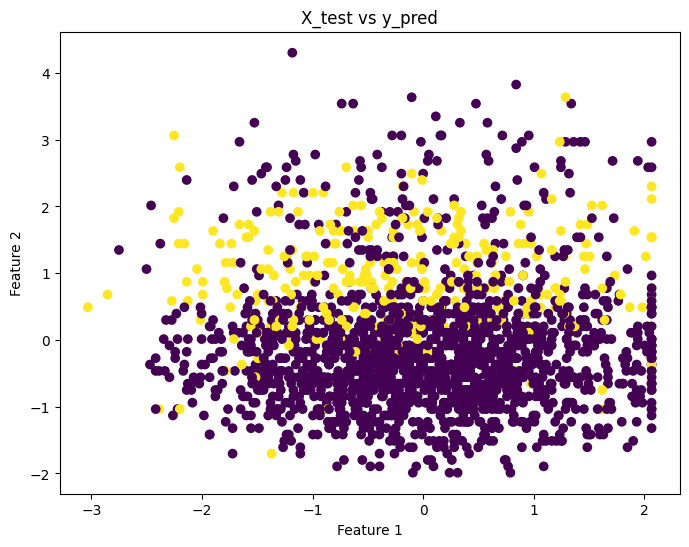

In [72]:
# prompt: import confusion matircs and plot xtest and ypred

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Plot the X_test and y_pred
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap="viridis")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("X_test vs y_pred")
plt.show()


In [73]:
# prompt: calculate accuracy score

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.84


In [75]:
# prompt: get the weights and save them

weights = classifier.get_weights()

# # Save the weights to a file
# with open('weights.npy', 'wb') as f:
#     np.save(f, weights)
